# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Wikan Haydarrahman
- **Email:** wikanhaydar23peb@gmail.com
- **ID Dicoding:** wikanhaydar

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana kualitas udara (PM2.5) bervariasi berdasarkan musim dan waktu (bulan dan tahun) di kedua stasiun?
- Pertanyaan 2:
Bagaimana hubungan antara faktor cuaca (temperatur, tekanan, kelembaban) dengan polutan seperti PM2.5 dan PM10?


## Import Semua Packages/Library yang Digunakan

import semua library yang digunakan dan memastikan visualisasi lebih rapi

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Data Wrangling

### Gathering Data

input dataset

In [65]:
gucheng_data = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')
guanyuan_data = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')

In [66]:
guanyuan_data['station'] = 'Guanyuan'
gucheng_data['station'] = 'Gucheng'

Menggabungkan kedua dataset

In [67]:
gabungan = pd.concat([gucheng_data, guanyuan_data], ignore_index=True)

In [68]:
gabungan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**Insight:**
- Dataset berisi data kualitas udara dari dua stasiun berbeda: Guanyuan dan Gucheng
- Kedua dataset memiliki kolom atribut yang sama
- Dilakukan penggabungan dua dataset

### Assessing Data

In [69]:
gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   year     70128 non-null  int64  
 2   month    70128 non-null  int64  
 3   day      70128 non-null  int64  
 4   hour     70128 non-null  int64  
 5   PM2.5    68866 non-null  float64
 6   PM10     69318 non-null  float64
 7   SO2      69147 non-null  float64
 8   NO2      68801 non-null  float64
 9   CO       66974 non-null  float64
 10  O3       68226 non-null  float64
 11  TEMP     70057 non-null  float64
 12  PRES     70058 non-null  float64
 13  DEWP     70057 non-null  float64
 14  RAIN     70065 non-null  float64
 15  wd       69888 non-null  object 
 16  WSPM     70072 non-null  float64
 17  station  70128 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 9.6+ MB


In [70]:
gabungan.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,68866.000000,69318.000000,69147.000000,68801.000000,66974.000000,68226.000000,70057.000000,70058.000000,70057.000000,70065.000000,70072.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.392530,113.946047,16.479082,56.886492,1297.772837,56.751143,13.724504,1010.338902,2.866866,0.065937,1.525976
std,10122.177085,1.177205,3.448728,8.800155,6.922236,81.870559,94.323110,22.462422,35.832508,1187.510353,57.234771,11.346907,10.365129,13.738296,0.875090,1.191937
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,984.000000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,42.000000,3.000000,28.000000,500.000000,9.000000,3.400000,1001.900000,-8.500000,0.000000,0.700000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,94.000000,8.000000,51.000000,900.000000,43.000000,14.700000,1010.000000,3.400000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,158.000000,21.000000,79.000000,1600.000000,82.000000,23.400000,1018.600000,15.500000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,999.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1042.000000,28.500000,72.500000,12.000000


In [71]:
gabungan.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,1262
PM10,810
SO2,981
NO2,1327
CO,3154


**Insight:**
- Dataset memiliki beberapa kolom dengan missing values, terutama pada kolom O3 dan CO.
- Beberapa kolom menunjukkan outlier yang perlu ditangani lebih lanjut.

### Cleaning Data

Atasi missing value dengan interpolasi linear untuk variabel numerik

In [72]:
gabungan.interpolate(method='linear', inplace=True)

<ipython-input-72-665853715999>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  gabungan.interpolate(method='linear', inplace=True)


Hapus baris yang memiliki missing value di kolom 'station'

In [73]:
gabungan.dropna(subset=['station'], inplace=True)

In [74]:
gabungan.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,20
CO,0


Gabungkan atribut year, month, day, dan hour menjadi satu atribut waktu

In [75]:
gabungan['waktu'] = pd.to_datetime(gabungan[['year', 'month', 'day', 'hour']])

In [76]:
gabungan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,waktu
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


**Insight:**
- Missing values berhasil diatasi menggunakan interpolasi.
- Masih terdapat beberapa atribut yang memiliki missing values seperti WD dan NO2.
- Kolom waktu (year, month, day, hour) telah diubah menjadi satu kolom datetime untuk memudahkan analisis berdasarkan waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [92]:
gabungan['year'] = gabungan['waktu'].dt.year


Mengelompokkan data berdasarkan tahun dan menghitung rata-rata PM2.5

In [93]:
gabungan_pm25_tahunan = gabungan.groupby(['year', 'station'])['PM2.5'].mean().reset_index()


Visualisasi perbandingan rata-rata PM.25

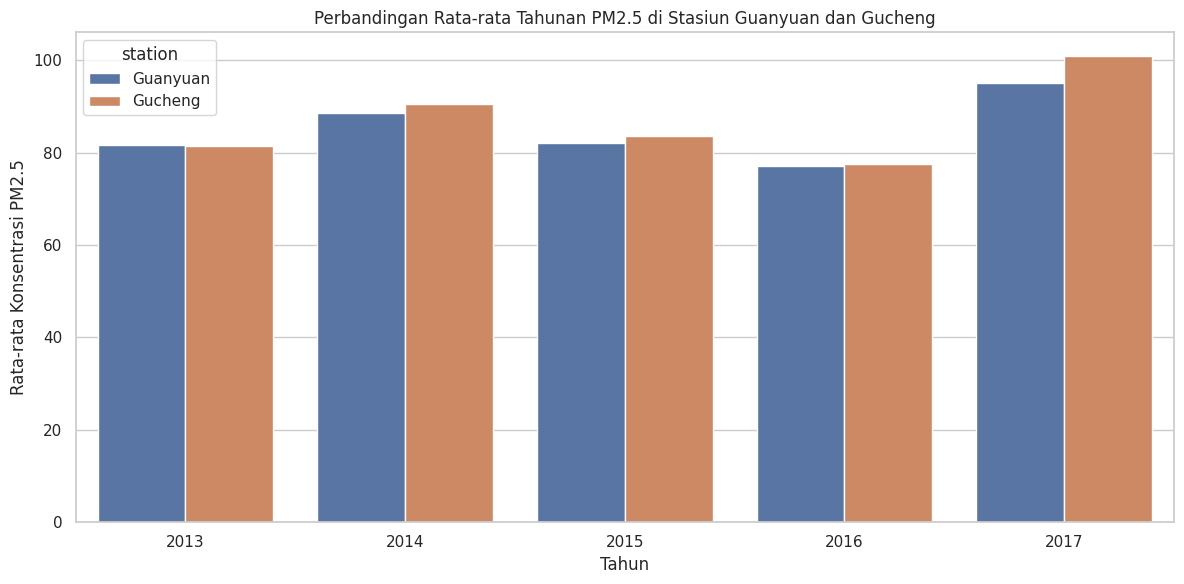

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='PM2.5', hue='station', data=gabungan_pm25_tahunan)
plt.title('Perbandingan Rata-rata Tahunan PM2.5 di Stasiun Guanyuan dan Gucheng')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Konsentrasi PM2.5')
plt.tight_layout()
plt.show()

Membuat kolom untuk mengelompokkan data berdasarkan musim

In [77]:
def musim(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

gabungan['season'] = gabungan['waktu'].dt.month.apply(musim)

Rata-rata PM2.5 berdasarkan musim

In [78]:
musim_pm25 = gabungan.groupby(['season', 'station'])['PM2.5'].mean().reset_index()


Visualisasi PM2.5 berdasarkan musim

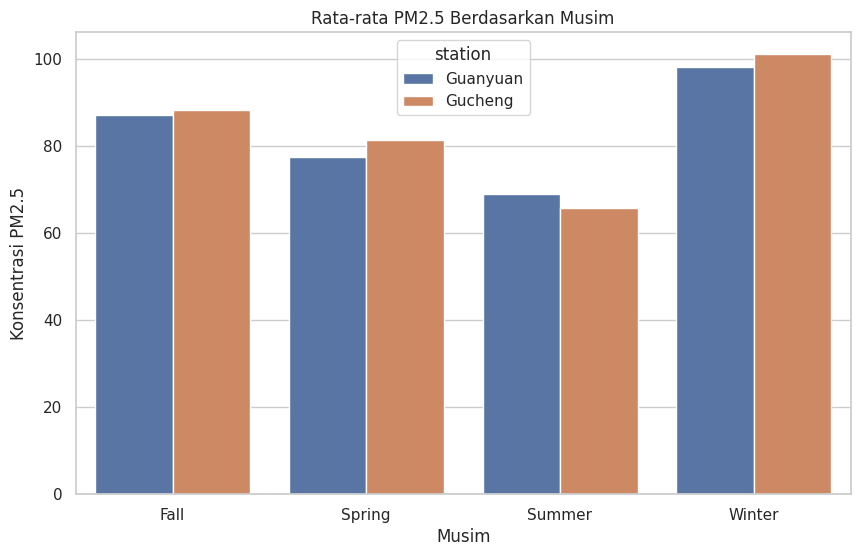

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='PM2.5', hue='station', data=musim_pm25)
plt.title('Rata-rata PM2.5 Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

**Insight:**
- Rata-rata PM2.5 cenderung lebih tinggi pada musim tertentu seperti musim dingin di kedua stasiun, yang menunjukkan adanya pola musiman pada polusi udara.
- Konsentrasi PM2.5 pada Stasiun Guanyuang lebih tinggi dari Stasiun Gucheng hanya pada musim panas

# Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara (PM2.5) bervariasi berdasarkan musim dan waktu (bulan dan tahun) di kedua stasiun?

Mengelompokkan data berdasarkan tahun dan bulan untuk mendapatkan rata-rata bulanan PM2.5


In [84]:
gabungan['bulan_dan_tahun'] = gabungan['waktu'].dt.to_period('M')

In [85]:
gabungan_pm25_bulanan = gabungan.groupby(['bulan_dan_tahun', 'station'])['PM2.5'].mean().reset_index()

Konversi bulan_dan_tahun menjadi string agar bisa dilakukan visualisasi Scatterplot oleh seaborn

In [86]:
gabungan_pm25_bulanan['bulan_dan_tahun'] = gabungan_pm25_bulanan['bulan_dan_tahun'].astype(str)

Visualisasi variasi rata-rata PM2.5

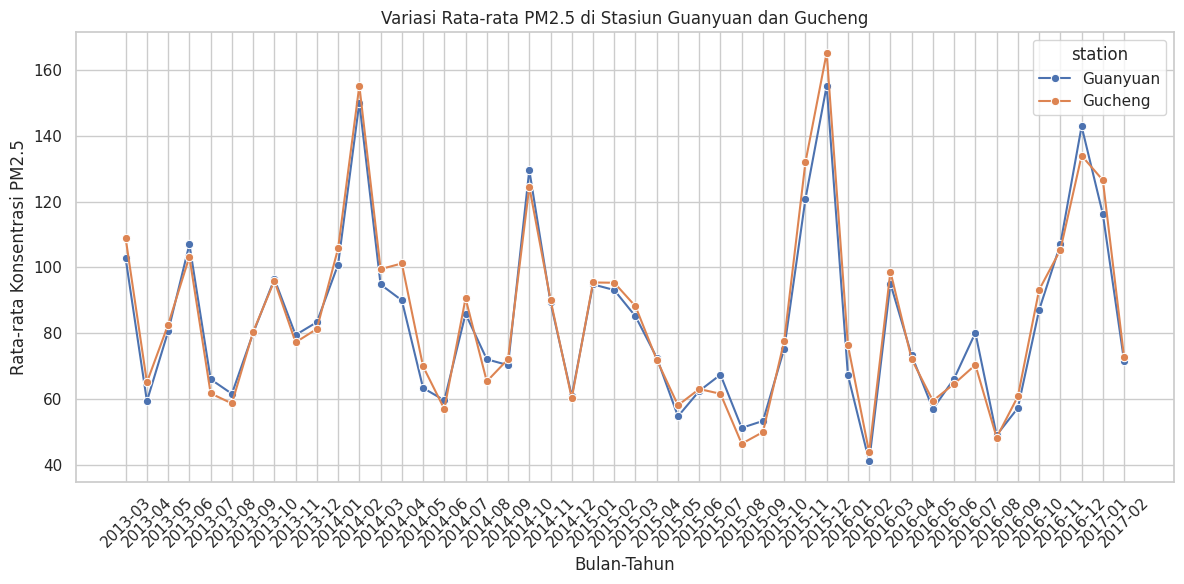

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='bulan_dan_tahun', y='PM2.5', hue='station', data=gabungan_pm25_bulanan, marker='o')
plt.title('Variasi Rata-rata PM2.5 di Stasiun Guanyuan dan Gucheng')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rata-rata Konsentrasi PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara faktor cuaca (temperatur, tekanan, kelembaban) dengan polutan seperti PM2.5 dan PM10?

Visualisasi hubungan antara temperatur dan PM2.5 menggunakan Scatterplot

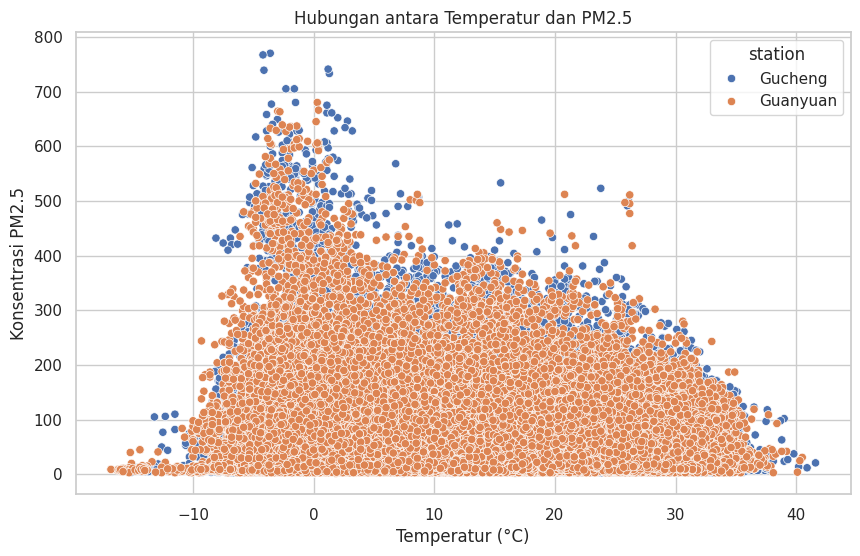

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', hue='station', data=gabungan)
plt.title('Hubungan antara Temperatur dan PM2.5')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

Visualisasi hubungan antara tekanan udara dan PM10 menggunakan Scatterplot

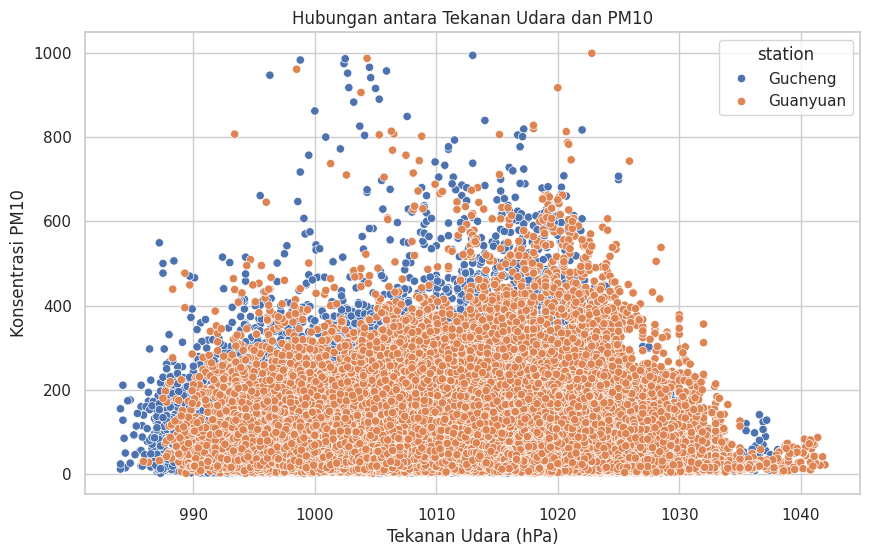

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRES', y='PM10', hue='station', data=gabungan)
plt.title('Hubungan antara Tekanan Udara dan PM10')
plt.xlabel('Tekanan Udara (hPa)')
plt.ylabel('Konsentrasi PM10')
plt.show()

**Insight:**
- Konsentrasi PM2.5 cenderung lebih rendah saat temperatur meningkat.
- Tekanan udara juga memiliki hubungan tertentu dengan PM10, menunjukkan pengaruh kondisi atmosfer pada polusi udara.


## Analisis Lanjutan (Opsional)

## Conclusion

1.   Conclusion pertanyaan 1:


*   Data menunjukkan bahwa rata-rata konsentrasi PM2.5 berbeda antara musim. Secara umum, musim Winter (musim dingin) memiliki konsentrasi PM2.5 yang lebih tinggi dibandingkan musim lainnya seperti Spring, Summer, dan Fall.

*   Stasiun Gucheng secara konsisten mencatat nilai PM2.5 yang lebih tinggi dibandingkan dengan Guanyuan di setiap musim kecuali musim dingin yang berarti Guanyuan mungkin lebih rentan terhadap polusi udara


*   Konsentrasi PM2.5 pada dua Stasiun mengalami fluktuasi yang cukup besar dan puncaknya berada pada Januari 2014, November 2015, dan November 2016.





2.   Conclusion pertanyaan 2:

*   Dari scatterplot hubungan antara temperatur dan PM2.5, terlihat bahwa PM2.5 cenderung lebih tinggi pada suhu yang lebih rendah. Hal ini konsisten dengan penemuan bahwa konsentrasi PM2.5 lebih tinggi di musim dingin, di mana suhu lebih rendah.

*   Scatterplot menunjukkan bahwa tekanan udara yang lebih tinggi cenderung berhubungan dengan konsentrasi PM10 yang lebih rendah. Tekanan tinggi umumnya mengindikasikan cuaca yang lebih stabil dan kering, yang mungkin mendukung pengendapan partikulat PM10 ke permukaan.






In [95]:
gabungan.to_csv("main_data.csv", index=False)